# Datasets

## About

Datasets

```{seealso}
For OIH the focus is on generic documents which can scope reports, data and other resources.
In those cases where the resources being described are of type Dataset you may wish to review
patterns developed for GeoScience Datasets by the ESIP
[Science on Schema](https://github.com/ESIPFed/science-on-schema.org/) community.

```

## Datasets

 Documents will include maps, reports,
guidance and other creative works.  Due to this OIH will focus on a generic example
of [schema.org/CreativeWork](https://schema.org/CreativeWork) and then provide examples
for more focused creative work examples.

```{literalinclude} ../../../odis-in/dataGraphs/thematics/dataset/graphs/datasetTemplate.json
:linenos:
```

```{note}
schema.org expects a lat long (Y X) coordinate order, so be aware of that when
you are defining your spatialCoverage, in the GeoShape or Box parameters.
```

## Demo area  please ignore

This area is being used to test out a new repository structure where the data graphs, 
frames and SHACL shapes are kept in a discrete location.

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "https://example.org/id/XYZ",
    "@type": "Map",
    "identifier": {
        "@id": "https://doi.org/10.5066/F7VX0DMQ",
        "@type": "PropertyValue",
        "propertyID": "https://registry.identifiers.org/registry/doi",
        "url": "https://doi.org/10.5066/F7VX0DMQ",
        "value": "doi:10.5066/F7VX0DMQ"
    }
}


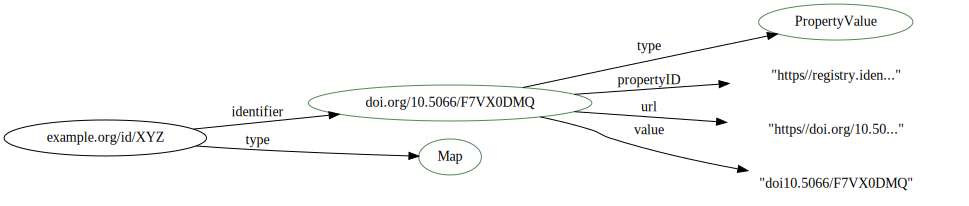

In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    
import json
from pyld import jsonld
import os, sys
import urllib
import contextlib

devnull = open(os.devnull, 'w')
contextlib.redirect_stderr(devnull)

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

 
url = "https://raw.githubusercontent.com/iodepo/odis-in/master/dataGraphs/thematics/docs/graphs/map.json"
dgraph = urllib.request.urlopen(url)
doc = json.load(dgraph)

furl = "https://raw.githubusercontent.com/iodepo/odis-in/master/frames/mapFrameID.json"
fgraph = urllib.request.urlopen(furl)
frame = json.load(fgraph)


context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)

framed = jsonld.frame(compacted, frame)
jd = json.dumps(framed, indent=4)
print(jd)

jbutils.show_graph(framed)